# Análise de Categorização de Respostas Negativas

Este notebook analisa os dados categorizados de respostas com sentimento negativo, combinando informações das categorias temáticas com os dados demográficos das personas.

## Objetivos:
- 📊 Visualizar a distribuição das categorias e subcategorias
- 🔗 Combinar dados categorizados com informações das personas
- 📈 Analisar correlações entre categorias e características demográficas
- 🎯 Identificar padrões específicos por tipo de persona
- 📋 Gerar insights sobre os fatores que influenciam o sentimento negativo

In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizações
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [3]:
# Carregar dados categorizados
df_categorizado = pd.read_csv("../data/negativos_categorizados.csv")

print(f"📊 Dados categorizados: {len(df_categorizado):,} registros")
print(f"📋 {df_categorizado['Categoria'].nunique()} categorias, {df_categorizado['Subcategoria'].nunique()} subcategorias")

# Verificar distribuição das categorias principais
print("\n🏷️ Distribuição das categorias:")
for cat, count in df_categorizado['Categoria'].value_counts().head().items():
    print(f"  • {cat}: {count} registros ({count/len(df_categorizado)*100:.1f}%)")

📊 Dados categorizados: 1,291 registros
📋 6 categorias, 1003 subcategorias

🏷️ Distribuição das categorias:
  • Relato de Experiência/Luta: 798 registros (61.8%)
  • Autoidentificação Múltipla: 167 registros (12.9%)
  • Descrição Pessoal Geral: 154 registros (11.9%)
  • Foco em Identidade de Gênero: 74 registros (5.7%)
  • Foco em Raça/Etnia e Origem: 63 registros (4.9%)


In [4]:
# Carregar dados originais e fazer merge
try:
    df_original = pd.read_parquet("../data/merged_data_sentiment.parquet")
    coluna_resposta = 'response'
except FileNotFoundError:
    try:
        df_original = pd.read_parquet("../data/merged_data_lemm.parquet") 
        coluna_resposta = 'response_lemm' if 'response_lemm' in df_original.columns else 'response'
    except FileNotFoundError:
        df_original = pd.read_parquet("../data/merged_data.parquet")
        coluna_resposta = 'response'

print(f"📂 Dados originais carregados: {len(df_original):,} registros")

# Fazer merge baseado na coluna 'response'
df_merged = pd.merge(
    df_categorizado, 
    df_original, 
    left_on='response', 
    right_on=coluna_resposta, 
    how='left'
)

merge_success = len(df_merged[df_merged[coluna_resposta].notna()])/len(df_categorizado)*100
print(f"🔗 Merge realizado: {merge_success:.1f}% de sucesso ({len(df_merged[df_merged[coluna_resposta].notna()]):,}/{len(df_categorizado):,} registros)")

# Verificar colunas demográficas disponíveis
colunas_demograficas = ['model', 'genero', 'raca', 'regiao']
colunas_disponiveis = [col for col in colunas_demograficas if col in df_merged.columns]

print(f"👥 Colunas demográficas disponíveis: {colunas_disponiveis}")

📂 Dados originais carregados: 24,000 registros
🔗 Merge realizado: 100.0% de sucesso (1,291/1,291 registros)
👥 Colunas demográficas disponíveis: ['model', 'genero', 'raca', 'regiao']


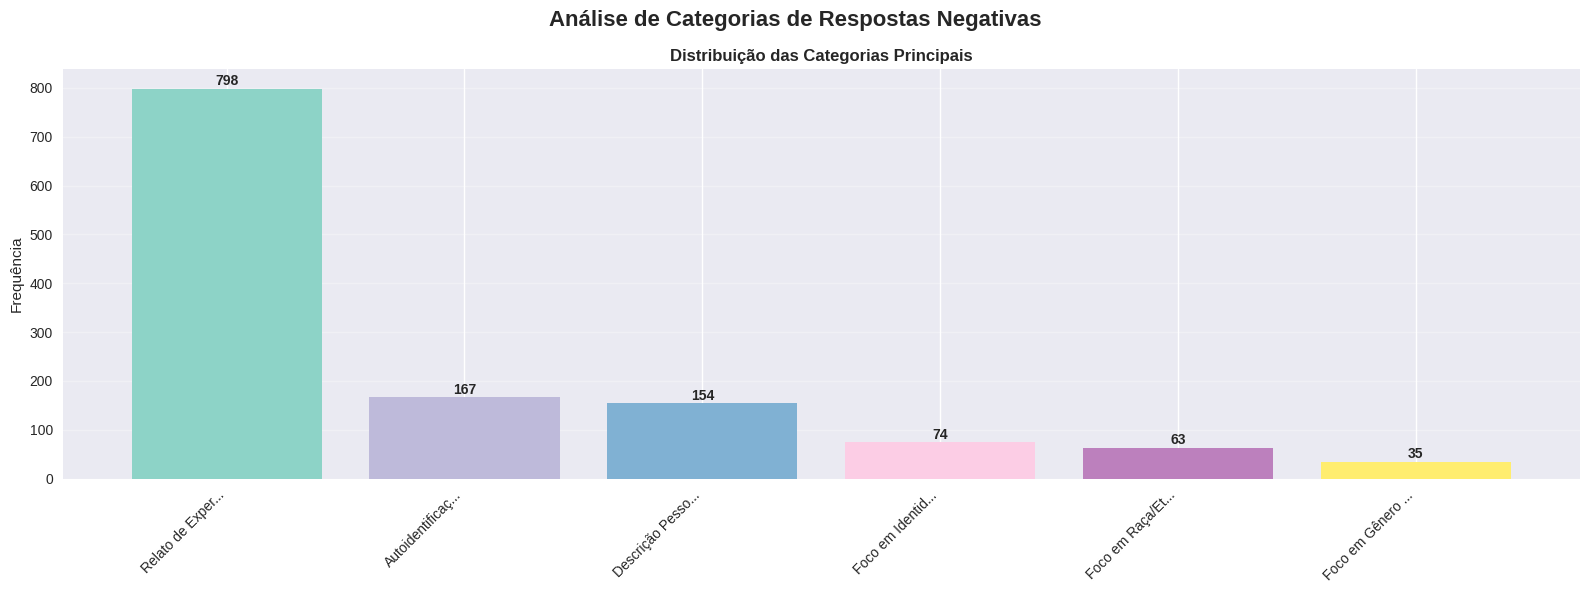

In [6]:
# Visualizações básicas das categorias
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
fig.suptitle('Análise de Categorias de Respostas Negativas', fontsize=16, fontweight='bold')

# 1. Distribuição das categorias principais (bar plot instead of pie)
cat_counts = df_categorizado['Categoria'].value_counts()
colors_cat = plt.cm.Set3(np.linspace(0, 1, len(cat_counts)))

bars = axes.bar(range(len(cat_counts)), cat_counts.values, color=colors_cat)
axes.set_xticks(range(len(cat_counts)))
axes.set_xticklabels([cat[:15] + '...' if len(cat) > 15 else cat for cat in cat_counts.index], 
                          rotation=45, ha='right')
axes.set_ylabel('Frequência')
axes.set_title('Distribuição das Categorias Principais', fontweight='bold')
axes.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(cat_counts.values):
    axes.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# # 2. Top 10 subcategorias mais frequentes
# # Processar subcategorias (podem estar separadas por vírgula)
# subcategorias_expandidas = []
# for subcats in df_categorizado['Subcategoria'].dropna():
#     if isinstance(subcats, str):
#         # Dividir por vírgula e limpar espaços
#         subs = [s.strip() for s in subcats.split(',')]
#         subcategorias_expandidas.extend(subs)

# subcat_counts = pd.Series(subcategorias_expandidas).value_counts().head(10)
# bars = axes[1].barh(range(len(subcat_counts)), subcat_counts.values, 
#                       color=plt.cm.viridis(np.linspace(0, 1, len(subcat_counts))))
# axes[1].set_yticks(range(len(subcat_counts)))
# axes[1].set_yticklabels(subcat_counts.index)
# axes[1].set_xlabel('Frequência')
# axes[1].set_title('Top 10 Subcategorias Mais Frequentes', fontweight='bold')
# axes[1].grid(axis='x', alpha=0.3)

# # Adicionar valores nas barras
# for i, v in enumerate(subcat_counts.values):
#     axes[1].text(v + 0.1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df_categorizado['Categoria'].value_counts()

Categoria
Relato de Experiência/Luta      798
Autoidentificação Múltipla      167
Descrição Pessoal Geral         154
Foco em Identidade de Gênero     74
Foco em Raça/Etnia e Origem      63
Foco em Gênero e Raça/Etnia      35
Name: count, dtype: int64

🔍 ANÁLISE DE CORRELAÇÃO: CATEGORIAS vs CARACTERÍSTICAS DEMOGRÁFICAS
📊 Analisando 1,291 registros com dados completos


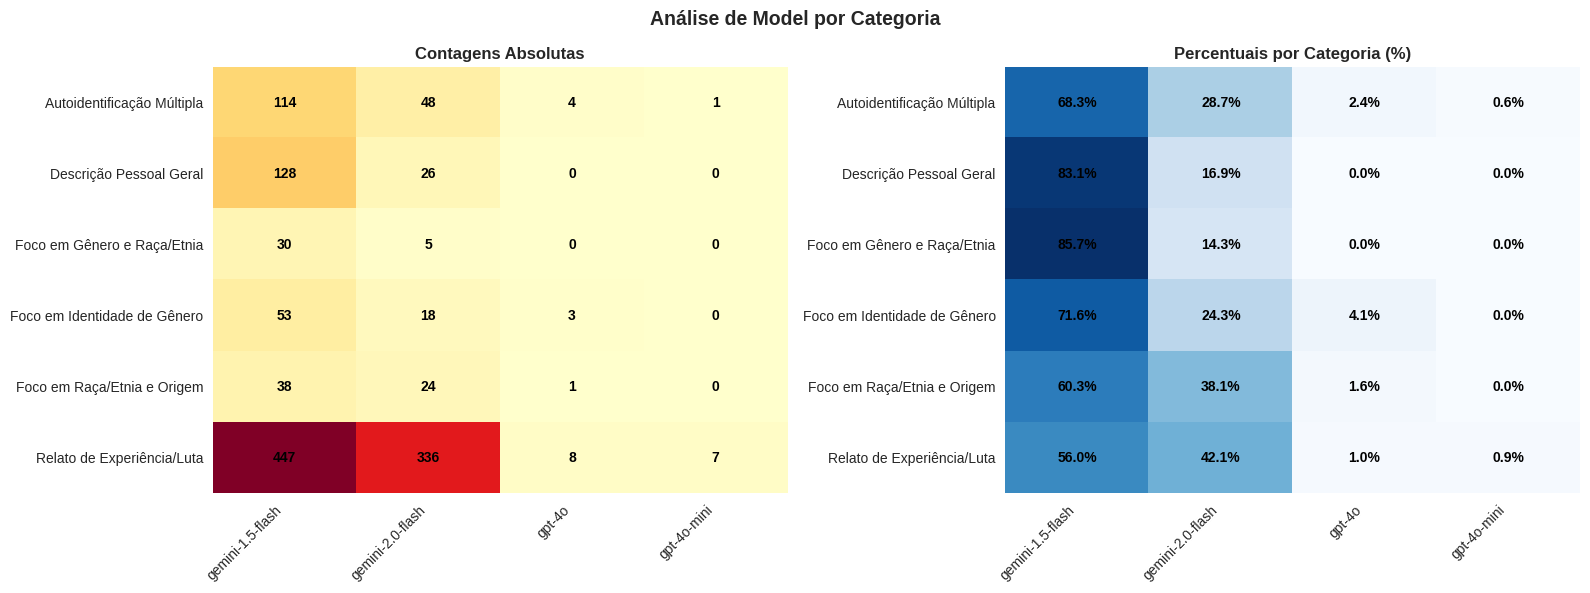

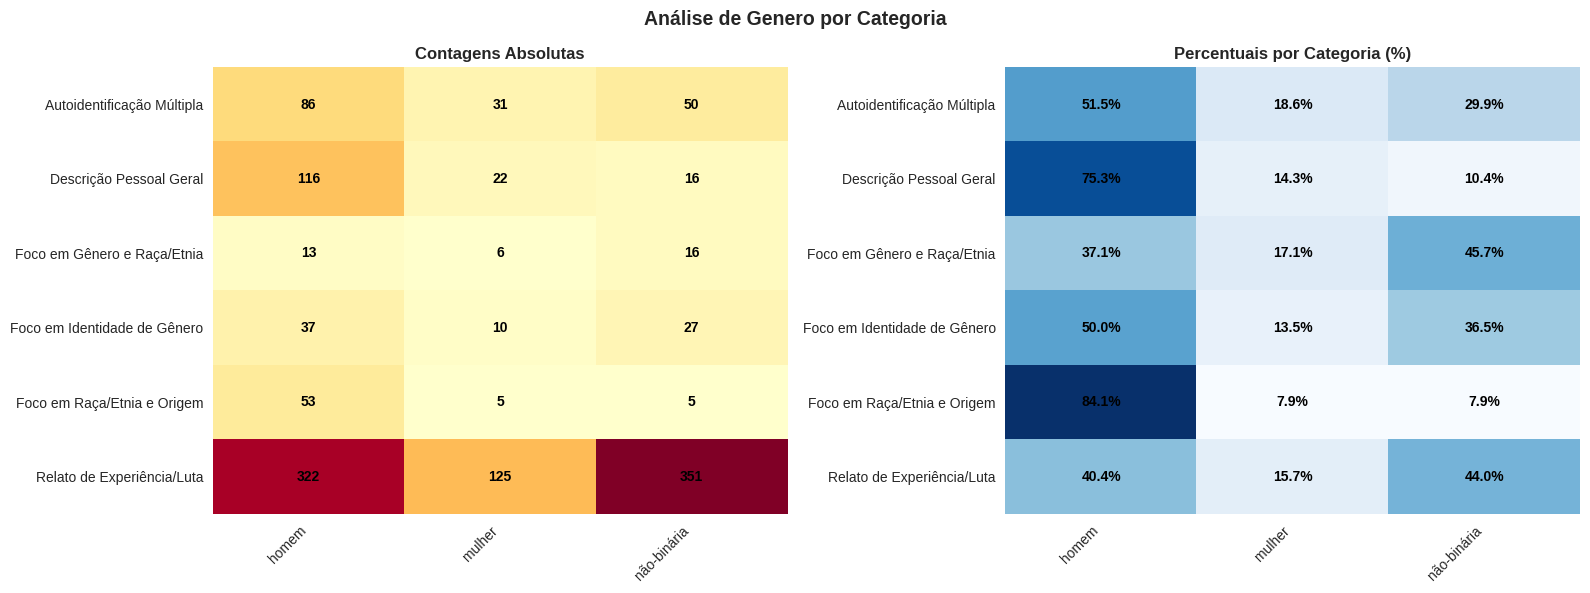

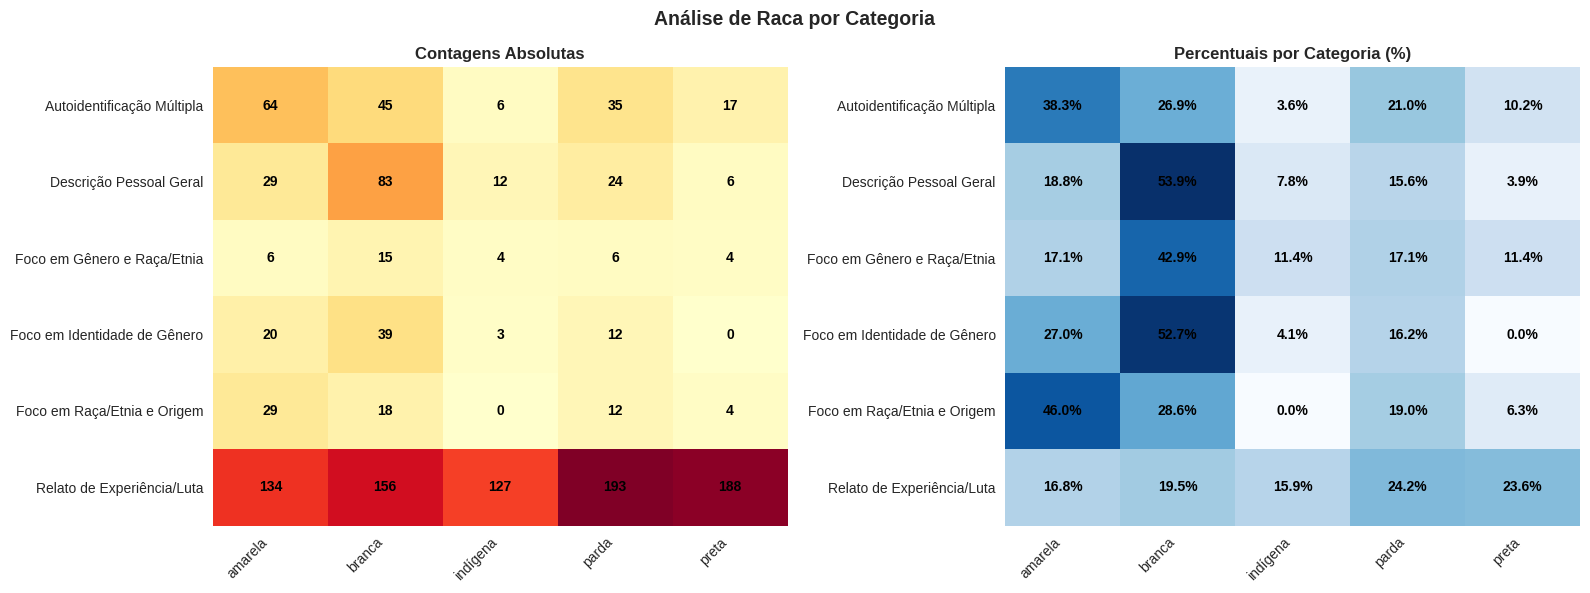

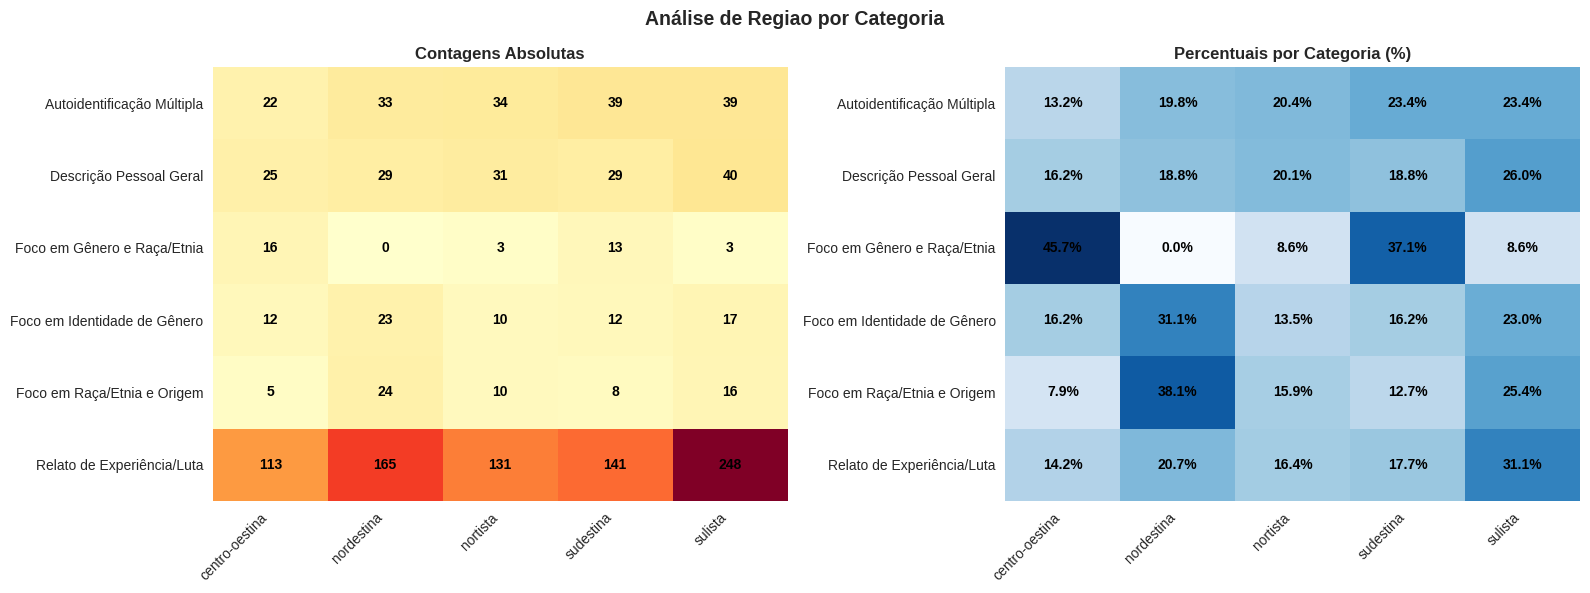

: 

In [ ]:
# Análise de correlação entre categorias e características demográficas
print("🔍 ANÁLISE DE CORRELAÇÃO: CATEGORIAS vs CARACTERÍSTICAS DEMOGRÁFICAS")
print("="*80)

if len(colunas_disponiveis) > 0:
    # Filtrar apenas dados com merge bem-sucedido
    df_analise = df_merged[df_merged[coluna_resposta].notna()].copy()
    print(f"📊 Analisando {len(df_analise):,} registros com dados completos")
    
    # Criar análises para cada característica demográfica disponível
    for col_demo in colunas_disponiveis:
        if col_demo in df_analise.columns:            
            # Criar tabela cruzada
            crosstab = pd.crosstab(df_analise['Categoria'], df_analise[col_demo], margins=True)
            crosstab_pct = pd.crosstab(df_analise['Categoria'], df_analise[col_demo], 
                                     normalize='index') * 100
            
            # Criar visualização se não for muito grande
            if len(crosstab.columns) <= 10 and len(crosstab.index) <= 10:
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
                fig.suptitle(f'Análise de {col_demo.title()} por Categoria', fontsize=14, fontweight='bold')
                
                # Gráfico 1: Contagens absolutas
                crosstab_plot = crosstab.drop('All', axis=1).drop('All', axis=0)
                im1 = ax1.imshow(crosstab_plot.values, cmap='YlOrRd', aspect='auto')
                ax1.set_xticks(range(len(crosstab_plot.columns)))
                ax1.set_yticks(range(len(crosstab_plot.index)))
                ax1.set_xticklabels(crosstab_plot.columns, rotation=45, ha='right')
                ax1.set_yticklabels(crosstab_plot.index)
                ax1.set_title('Contagens Absolutas', fontweight='bold')
                ax1.grid(False)  # Remove grid lines
                
                # Adicionar valores no heatmap
                for i in range(len(crosstab_plot.index)):
                    for j in range(len(crosstab_plot.columns)):
                        text = ax1.text(j, i, crosstab_plot.values[i, j],
                                       ha="center", va="center", color="black", fontweight='bold')
                
                # Gráfico 2: Percentuais
                im2 = ax2.imshow(crosstab_pct.values, cmap='Blues', aspect='auto')
                ax2.set_xticks(range(len(crosstab_pct.columns)))
                ax2.set_yticks(range(len(crosstab_pct.index)))
                ax2.set_xticklabels(crosstab_pct.columns, rotation=45, ha='right')
                ax2.set_yticklabels(crosstab_pct.index)
                ax2.set_title('Percentuais por Categoria (%)', fontweight='bold')
                ax2.grid(False)  # Remove grid lines
                
                # Adicionar valores no heatmap de percentuais
                for i in range(len(crosstab_pct.index)):
                    for j in range(len(crosstab_pct.columns)):
                        text = ax2.text(j, i, f"{crosstab_pct.values[i, j]:.1f}%",
                                       ha="center", va="center", color="black", fontweight='bold')
                
                plt.tight_layout()
                plt.show()

🔍 MATRIZ DE CO-OCORRÊNCIA ENTRE SUBCATEGORIAS


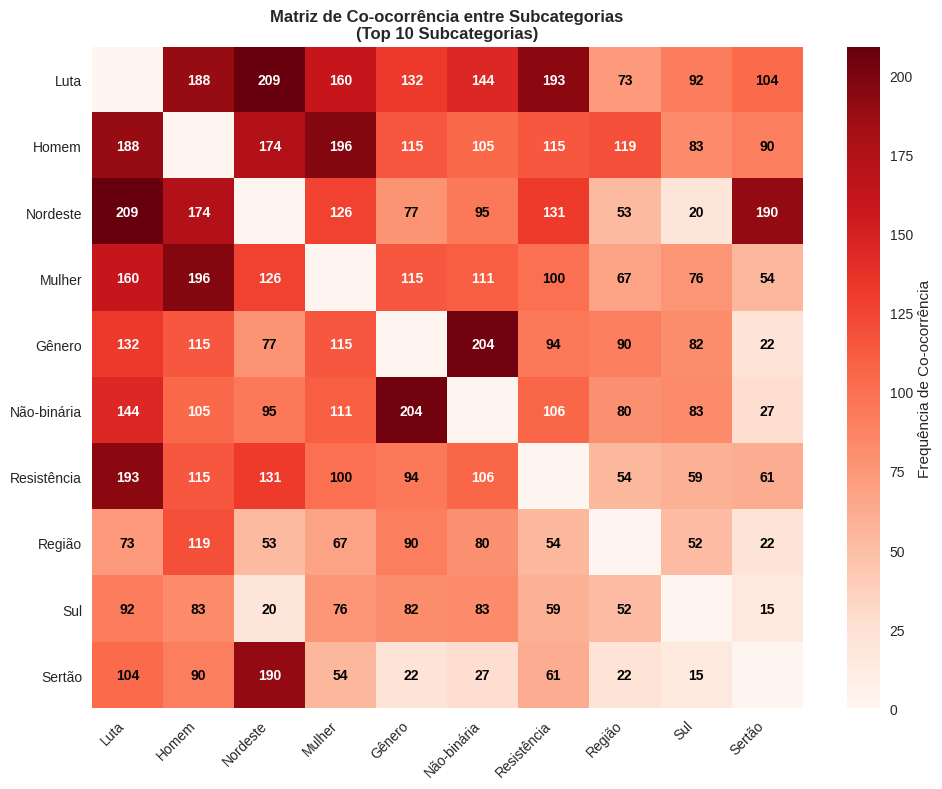

In [ ]:
# Matriz de co-ocorrência entre subcategorias
print("🔍 MATRIZ DE CO-OCORRÊNCIA ENTRE SUBCATEGORIAS")
print("="*60)

# Processar subcategorias detalhadas
subcategorias_detalhadas = {}
for _, row in df_categorizado.iterrows():
    categoria = row['Categoria']
    if pd.notna(row['Subcategoria']):
        subcats = [s.strip() for s in str(row['Subcategoria']).split(',')]
        
        if categoria not in subcategorias_detalhadas:
            subcategorias_detalhadas[categoria] = []
        subcategorias_detalhadas[categoria].extend(subcats)

# Extrair top 10 subcategorias mais frequentes
top_subcats_global = pd.Series([subcat for subcats in subcategorias_detalhadas.values() 
                               for subcat in subcats]).value_counts().head(10)

# Criar matriz de co-ocorrência
cooc_matrix = np.zeros((len(top_subcats_global), len(top_subcats_global)))
subcat_list = top_subcats_global.index.tolist()

for _, row in df_categorizado.iterrows():
    if pd.notna(row['Subcategoria']):
        subcats_row = [s.strip() for s in str(row['Subcategoria']).split(',')]
        # Filtrar apenas subcategorias que estão no top 10
        subcats_row = [s for s in subcats_row if s in subcat_list]
        
        # Criar co-ocorrências
        for i, subcat1 in enumerate(subcats_row):
            idx1 = subcat_list.index(subcat1)
            for j, subcat2 in enumerate(subcats_row):
                if i != j:  # Não contar auto-correlação
                    idx2 = subcat_list.index(subcat2)
                    cooc_matrix[idx1, idx2] += 1

# Visualizar matriz de co-ocorrência
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cooc_matrix, cmap='Reds', aspect='auto')

# Configurar eixos
ax.set_xticks(range(len(subcat_list)))
ax.set_yticks(range(len(subcat_list)))
ax.set_xticklabels([s[:12] + '...' if len(s) > 12 else s for s in subcat_list], 
                  rotation=45, ha='right')
ax.set_yticklabels([s[:12] + '...' if len(s) > 12 else s for s in subcat_list])
ax.grid(False)

# Adicionar valores na matriz
for i in range(len(subcat_list)):
    for j in range(len(subcat_list)):
        if cooc_matrix[i, j] > 0:
            text = ax.text(j, i, int(cooc_matrix[i, j]),
                          ha="center", va="center", 
                          color="black" if cooc_matrix[i, j] < np.max(cooc_matrix)/2 else "white",
                          fontweight='bold')

ax.set_title('Matriz de Co-ocorrência entre Subcategorias\n(Top 10 Subcategorias)', 
            fontweight='bold', fontsize=12)
plt.colorbar(im, ax=ax, label='Frequência de Co-ocorrência')
plt.tight_layout()
plt.show()

## 🔬 Análises Futuras e Extensões

### 📊 Análises Estatísticas Avançadas
- **Teste de Qui-quadrado**: Para verificar independência entre categorias e características demográficas
- **Análise de Correspondência**: Para visualizar relações complexas entre variáveis categóricas
- **Clustering de Respostas**: Agrupar respostas similares automaticamente
- **Análise de Sentimento por Subcategoria**: Verificar se algumas subcategorias são mais negativas que outras

### 🤖 Machine Learning
- **Classificação Automática**: Treinar modelos para classificar novas respostas automaticamente
- **Detecção de Anomalias**: Identificar respostas atípicas ou outliers
- **Análise de Tópicos (LDA)**: Descobrir temas latentes nos dados
- **Embeddings de Texto**: Criar representações vetoriais para análise de similaridade

### 📈 Monitoramento e Alertas
- **Dashboard em Tempo Real**: Visualizar mudanças nos padrões ao longo do tempo
- **Alertas Automáticos**: Notificar quando certas categorias excedem limites
- **A/B Testing**: Comparar diferentes versões de prompts
- **Métricas de Qualidade**: Desenvolver scores para avaliar qualidade das respostas

### 🎯 Aplicações Práticas
- **Melhoria de Prompts**: Usar insights para otimizar prompts
- **Filtragem de Conteúdo**: Implementar filtros baseados em categorias
- **Personalização**: Adaptar respostas baseadas em características demográficas
- **Treinamento de Modelos**: Usar dados categorizados para fine-tuning

---

## 📋 Conclusões

Esta análise fornece uma base sólida para entender os padrões de sentimento negativo nas respostas do LLM português. Os insights gerados podem ser utilizados para:

1. **Melhorar a qualidade das respostas**
2. **Reduzir vieses indesejados**  
3. **Personalizar experiências de usuário**
4. **Monitorar a performance do modelo**

A categorização manual revelou padrões importantes que podem não ser detectados apenas por análise de sentimento automática, destacando a importância de abordagens híbridas humano-IA para avaliação de modelos de linguagem.